<a href="https://colab.research.google.com/github/christophersingh/Master/blob/main/Master_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv?raw=true', names=['pregnant','glucose','bloodPressure','diabetes','thickness','insulin','BMI','age','target'])
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.describe()

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.isna().sum()

pregnant         0
glucose          0
bloodPressure    0
diabetes         0
thickness        0
insulin          0
BMI              0
age              0
target           0
dtype: int64

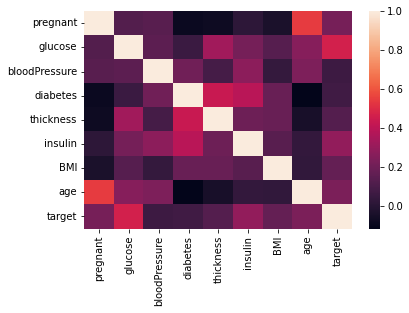

In [4]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)
pass;

Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


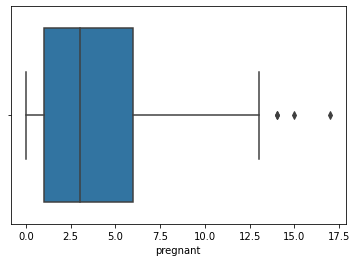

In [5]:
sns.boxplot(df['pregnant'])
pass;

In [6]:
(np.where(df['pregnant']>13))

(array([ 88, 159, 298, 455]),)

Z-score Normalization

99% of data is within 3 standard deviations away from the mean

In [7]:
from scipy import stats
import numpy as np

outliers = []

def check_outlier(row):
  z = np.abs(stats.zscore(row))
  threshold = 3
  outliers.append((np.where(z > 3)))
  return list((np.where(z > 3)))

res = df.apply(check_outlier) 
z = np.abs(stats.zscore(df['pregnant']))
y = np.abs(stats.zscore(df['glucose']))
res.drop(['target'], inplace = True, axis = 1)
res

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age
0,"[88, 159, 298, 455]","[75, 182, 342, 349, 502]","[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 26...",[579],"[8, 13, 111, 153, 186, 220, 228, 247, 286, 370...","[9, 49, 60, 81, 145, 177, 371, 426, 445, 494, ...","[4, 45, 58, 228, 330, 370, 371, 395, 445, 593,...","[123, 453, 459, 666, 684]"


In [8]:
helper = []
for x in outliers:
  np.asarray(x)
  helper.append(x[0])

helper

[array([ 88, 159, 298, 455]),
 array([ 75, 182, 342, 349, 502]),
 array([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
        332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
        535, 589, 601, 604, 619, 643, 697, 703, 706]),
 array([579]),
 array([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
        584, 645, 655, 695, 753]),
 array([  9,  49,  60,  81, 145, 177, 371, 426, 445, 494, 522, 673, 684,
        706]),
 array([  4,  45,  58, 228, 330, 370, 371, 395, 445, 593, 621]),
 array([123, 453, 459, 666, 684]),
 array([], dtype=int64)]

In [9]:
result = []
seen = set()
for innerlist in helper:
  for item in innerlist:
    if not item in seen:
      seen.add(item)
      result.append(item)

In [10]:
len(result)

80

In [11]:
rows = df.index[result]

df.drop(rows, inplace=True)
df_cluster = df
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df["target"].value_counts()

0    461
1    227
Name: target, dtype: int64

In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable

X, Y = ros.fit_resample(df.iloc[:, 0:8], df['target'])
X.shape, Y.shape

((922, 8), (922,))

In [14]:
Y.value_counts()

1    461
0    461
Name: target, dtype: int64

In [15]:
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6,7
0,0.545681,0.696653,-0.104756,0.883126,-0.802151,0.120664,0.505728,1.360061
1,-0.959759,-1.297817,-0.579765,0.502046,-0.802151,-0.953196,-0.418576,-0.301066
2,1.147857,1.804692,-0.738102,-1.339845,-0.802151,-1.459444,0.656430,-0.213639
3,-0.959759,-1.171184,-0.579765,0.120965,0.179920,-0.723083,-1.034778,-1.175344
4,0.244593,-0.316411,0.053580,-1.339845,-0.802151,-1.106605,-0.920915,-0.388494
...,...,...,...,...,...,...,...,...
917,1.750033,0.095146,-0.896438,0.946640,-0.802151,1.286569,-0.117172,0.310928
918,0.244593,1.013236,0.845262,1.264207,1.391838,1.010433,-0.271223,-0.475922
919,-0.056495,0.633337,0.370253,-1.339845,-0.802151,0.872366,0.147393,2.846333
920,-0.357583,0.063488,-0.104756,0.247992,1.182886,-0.063427,0.244512,-0.650777


In [16]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
warnings.filterwarnings("ignore")

outcome = []
model_names = []
models = [('LogReg', LogisticRegression()),
          ('DecTree', DecisionTreeClassifier()),
          ('KNN\t', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('RanForest', RandomForestClassifier()),
          ('XGB\t', XGBClassifier())
          ]

In [17]:
for model_name, model in models:
    k_fold_validation = model_selection.StratifiedKFold(n_splits=10)
    results = model_selection.cross_validate(model, X, Y, cv=k_fold_validation, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc'])
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| \t Accuracy=%f Precision=%f Recall=%f F1=%f AUC=%f" % (model_name, results['test_accuracy'].mean(), results['test_precision_macro'].mean(), results['test_recall_macro'].mean(), results['test_f1_macro'].mean(), results['test_roc_auc'].mean())
    print(output_message)

LogReg| 	 Accuracy=0.760402 Precision=0.762206 Recall=0.760315 F1=0.759899 AUC=0.846981
DecTree| 	 Accuracy=0.843946 Precision=0.855545 Recall=0.843895 F1=0.842848 AUC=0.843895
KNN	| 	 Accuracy=0.769016 Precision=0.772519 Recall=0.768941 F1=0.768278 AUC=0.834070
LinDisc| 	 Accuracy=0.762576 Precision=0.765679 Recall=0.762465 F1=0.761757 AUC=0.847969
GaussianNB| 	 Accuracy=0.741959 Precision=0.743969 Recall=0.741883 F1=0.741342 AUC=0.826720
RanForest| 	 Accuracy=0.878623 Precision=0.884472 Recall=0.878562 F1=0.878227 AUC=0.955866
XGB	| 	 Accuracy=0.816784 Precision=0.820191 Recall=0.816698 F1=0.816252 AUC=0.889391


In [18]:
accuracy, precision, recall, f1, auc = [], [], [], [], []
for x in range(0,7):
  accuracy.append(outcome[x]['test_accuracy'])
  precision.append(outcome[x]['test_precision_macro'])
  recall.append(outcome[x]['test_recall_macro'])
  f1.append(outcome[x]['test_f1_macro'])
  auc.append(outcome[x]['test_roc_auc'])

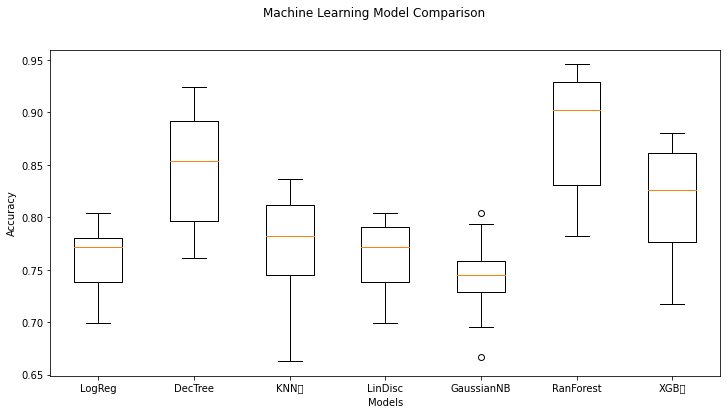

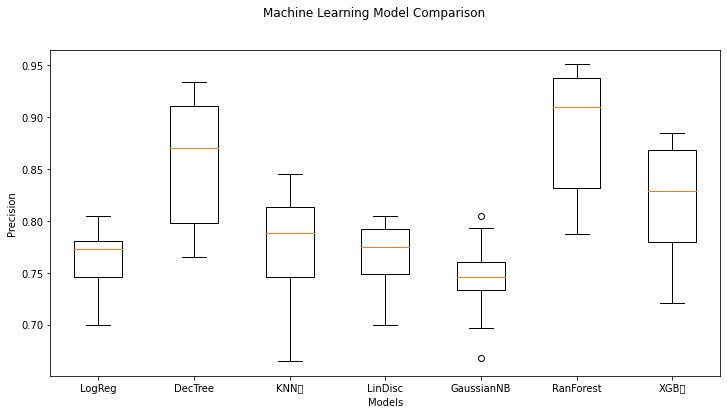

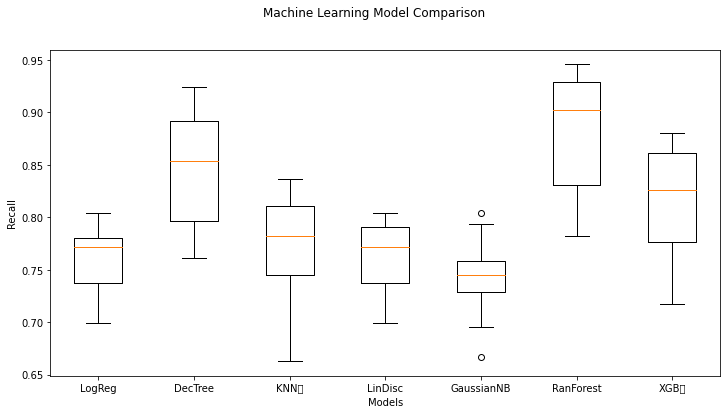

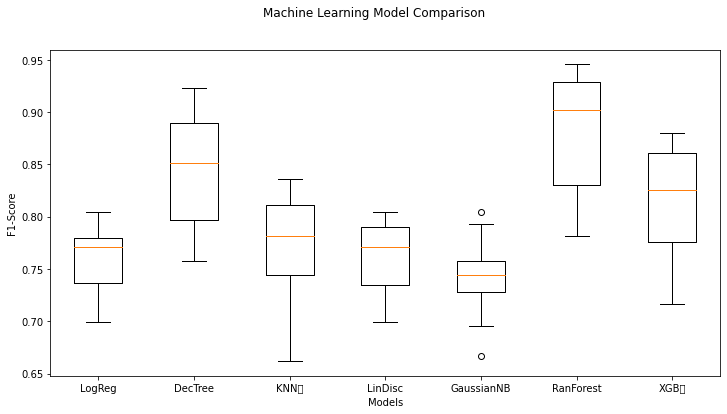

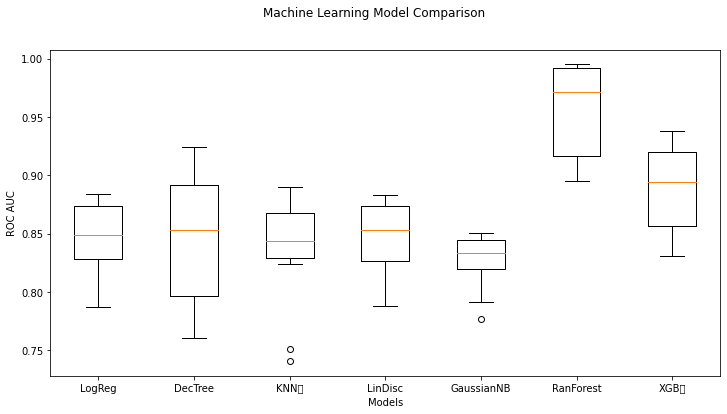

In [19]:
def plot_results(validation_metric, metric):
  fig = plt.figure(figsize=(12,6))
  fig.suptitle('Machine Learning Model Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot(validation_metric)
  plt.xlabel('Models')
  plt.ylabel(metric)
  ax.set_xticklabels(model_names)
  plt.show()

plot_results(accuracy, "Accuracy")
plot_results(precision, "Precision")
plot_results(recall, "Recall")
plot_results(f1, "F1-Score")
plot_results(auc, "ROC AUC")

In [20]:
!pip install -q tensorflow

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [22]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((645, 8), (277, 8), (645,), (277,))

In [23]:
F_statistic, p_values = f_classif(X_train, Y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table[ANOVA_F_table['p values'] < 0.05]

,Numerical_Feature,F-Score,p values
0,1,216.520629,0.000000e+00
1,5,64.365180,0.000000e+00
2,7,47.126900,0.000000e+00
3,0,43.797261,1.000000e-10
4,2,32.948371,1.460000e-08
5,6,29.020056,1.006000e-07
6,4,11.559346,7.157946e-04


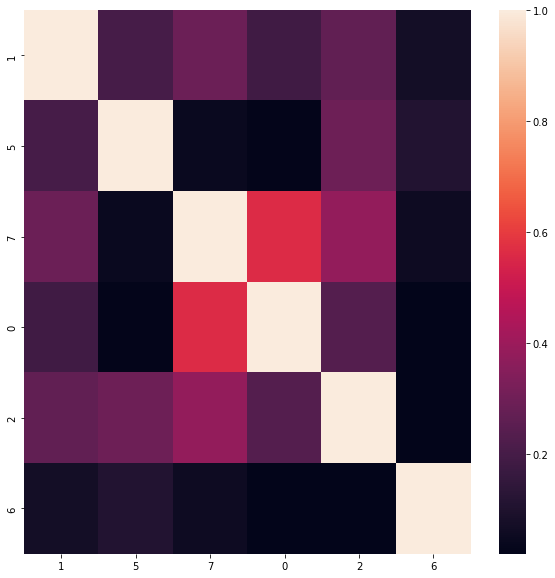

In [24]:
top_num_features = ANOVA_F_table.iloc[:6,0].to_list()
corrmat = X_train[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [25]:
drop_columns_list = ANOVA_F_table.iloc[6:, 0].to_list()

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)
col_to_drop(X_test, drop_columns_list)

In [26]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((645, 6), (277, 6), (645,), (277,))

In [27]:
for model_name, model in models:
    k_fold_validation = model_selection.StratifiedKFold(n_splits=10)
    results = model_selection.cross_validate(model, X_train, Y_train, cv=k_fold_validation, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc'])
    outcome.append(results)
    model_names.append(model_name) 
    output_message = "%s| \t Accuracy=%f Precision=%f Recall=%f F1=%f AUC=%f" % (model_name, results['test_accuracy'].mean(), results['test_precision_macro'].mean(), results['test_recall_macro'].mean(), results['test_f1_macro'].mean(), results['test_roc_auc'].mean())
    print(output_message)

LogReg| 	 Accuracy=0.749014 Precision=0.751024 Recall=0.747384 F1=0.746903 AUC=0.836657
DecTree| 	 Accuracy=0.823077 Precision=0.826932 Recall=0.824378 F1=0.822765 AUC=0.824378
KNN	| 	 Accuracy=0.750288 Precision=0.752450 Recall=0.751109 F1=0.750007 AUC=0.819318
LinDisc| 	 Accuracy=0.750529 Precision=0.753373 Recall=0.748366 F1=0.747932 AUC=0.836059
GaussianNB| 	 Accuracy=0.735000 Precision=0.736724 Recall=0.733677 F1=0.733054 AUC=0.828066
RanForest| 	 Accuracy=0.851178 Precision=0.855160 Recall=0.852022 F1=0.850882 AUC=0.924311
XGB	| 	 Accuracy=0.804784 Precision=0.805735 Recall=0.804811 F1=0.804399 AUC=0.872051


In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='sigmoid'))

        # Compile model
        model.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(6, 1, 6, i, 'model_{}'.format(i)) 
          for i in range(1, 5)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)        

In [29]:
from tensorflow.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=26,
                                 epochs=25,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 )
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    import numpy as np
    pred=model.predict(X_test)
    pred_digits=np.argmax(pred,axis=1)
    from sklearn.metrics import classification_report
    print(classification_report(Y_test, pred.round()))
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.4814472496509552
Test accuracy: 0.743682324886322
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       128
           1       0.80      0.69      0.74       149

    accuracy                           0.74       277
   macro avg       0.75      0.75      0.74       277
weighted avg       0.75      0.74      0.74       277

Model name: model_2
Test loss: 0.5178046226501465
Test accuracy: 0.7075812220573425
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       128
           1       0.72      0.74      0.73       149

    accuracy                           0.71       277
   macro avg       0.71      0.71      0.71       277
weighted avg       0.71      0.71      0.71       277

Model name: model_3
Test loss: 0.46739476919174194
Test accuracy: 0.7761732935905457
              precision    recall  f1-score   support

           0       0.78      0.71      

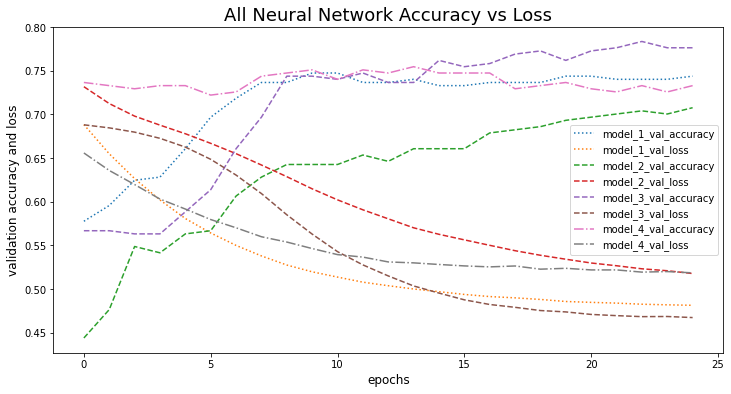

In [30]:
plt.rcParams["figure.figsize"] = (12,6)
for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    if(model_name in "model_1"):
        plt.plot(val_acc, label=model_name, linestyle='dotted')
        plt.plot(val_loss, label=model_name, linestyle='dotted')
    if(model_name in "model_2"):
        plt.plot(val_acc, label=model_name, linestyle='dashed')
        plt.plot(val_loss, label=model_name, linestyle='dashed')
    if(model_name in "model_3"):
        plt.plot(val_acc, label=model_name, linestyle='dashed')
        plt.plot(val_loss, label=model_name, linestyle='dashed')
    if(model_name in "model_4"):
        plt.plot(val_acc, label=model_name, linestyle='dashdot')
        plt.plot(val_loss, label=model_name, linestyle='dashdot')

plt.title('All Neural Network Accuracy vs Loss' , fontsize=18)
plt.ylabel('validation accuracy and loss', fontsize=12)
plt.xlabel('epochs', fontsize=12)
plt.legend([ 'model_1_val_accuracy', 'model_1_val_loss', 'model_2_val_accuracy', 'model_2_val_loss',
            'model_3_val_accuracy', 'model_3_val_loss', 'model_4_val_accuracy', 'model_4_val_loss'],loc='best')
plt.show()

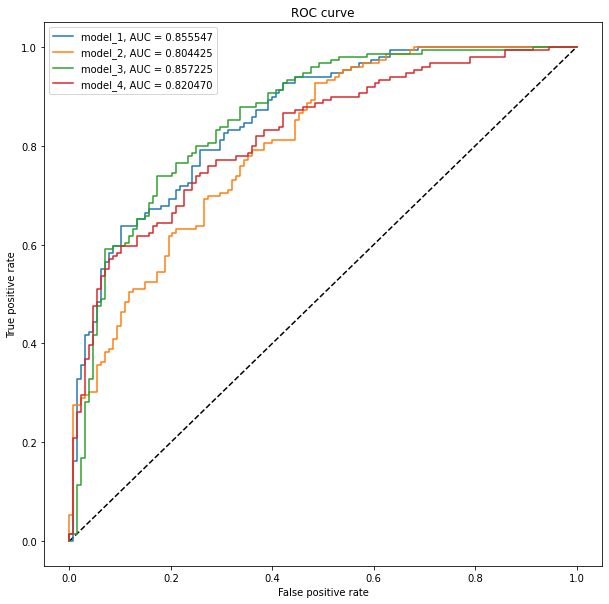

In [31]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


different_model_comparison = {
    "Random Forest":RandomForestClassifier(random_state=0,n_estimators=10),
    "Logistic Regression":LogisticRegression(random_state=0),
    "Decision Tree":DecisionTreeClassifier(random_state=0),
    "Support Vector Machines": SVC(probability=True), 
    "KNN": KNeighborsClassifier(),
    "Linear Discriminant": LinearDiscriminantAnalysis(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "Linear Support Vector": (SVC(kernel='linear',probability=True)),
}

def train_model(model_dict,X_train,y_train):
    for model in model_dict:
        model_dict[model].fit(X_train,y_train)
    return model_dict

from sklearn import metrics
def model_eval(clf_name,clf,X_test,y_test):
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
    report = pd.Series({
        "model":clf_name,
        "precision":metrics.precision_score(y_test, y_pred),
        "recall":metrics.recall_score(y_test, y_pred),
        "f1":metrics.f1_score(y_test, y_pred),
        'roc_auc_score' : metrics.roc_auc_score(y_test, y_score)
    })
    # draw ROC 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
    auc_report = auc(fpr, tpr)
    plt.figure(1, figsize=(10,10))
    plt.suptitle('ROC AUC')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.plot(fpr, tpr,label='{}, AUC = {:.6f}'.format(clf_name, auc_report))
    plt.plot([0,1],[0,1], 'k--', color = 'black')
    plt.legend()
    return report,confusion_matrix

def train_eval_model(model_dict,X_train,y_train,X_test,y_test):
    cols = ['model', 'roc_auc_score', 'precision', 'recall','f1']
    model_report = pd.DataFrame(columns = cols)
    cm_dict = {}
    model_dict = train_model(model_dict,X_train,y_train)
    for model in model_dict:
        report,confusion_matrix = model_eval(model,model_dict[model],X_test,y_test)
        model_report = model_report.append(report,ignore_index=True)
        cm_dict[model] = confusion_matrix
    return model_report,cm_dict

def plot_which_bar(df,col_name):
    df.set_index("model").loc[:,col_name].plot(kind='bar', stacked=True, sort_columns=True, figsize = (6,6))
    plt.title(col_name)
    plt.show()

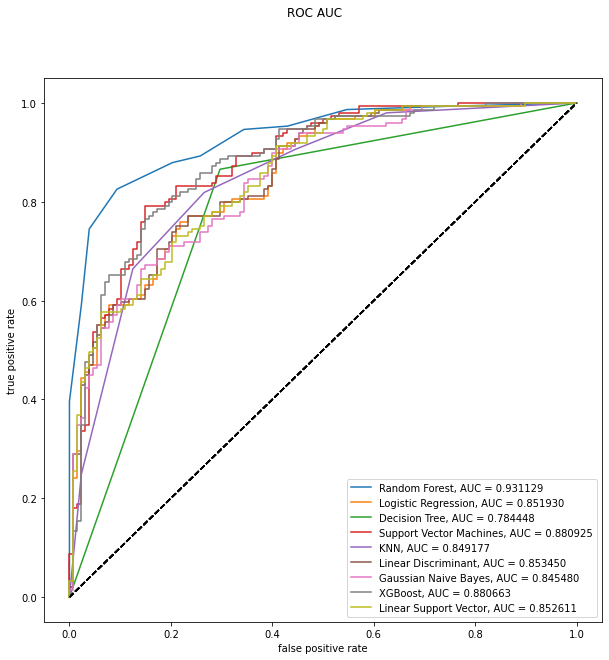

In [33]:
model_report, cm_dict = train_eval_model(different_model_comparison,X_train, Y_train, X_test, Y_test)

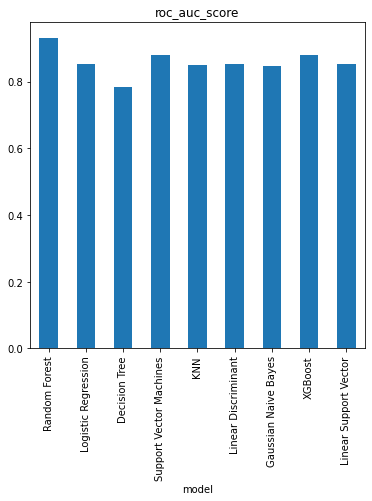

In [34]:
plot_which_bar(model_report,"roc_auc_score")

In [35]:
model_report

,model,roc_auc_score,precision,recall,f1
0,Random Forest,0.931129,0.834395,0.879195,0.856209
1,Logistic Regression,0.851930,0.804348,0.744966,0.773519
2,Decision Tree,0.784448,0.772455,0.865772,0.816456
3,Support Vector Machines,0.880925,0.815789,0.832215,0.823920
4,KNN,0.849177,0.782051,0.818792,0.800000
5,Linear Discriminant,0.853450,0.808824,0.738255,0.771930
6,Gaussian Naive Bayes,0.845480,0.769784,0.718121,0.743056
7,XGBoost,0.880663,0.798701,0.825503,0.811881
8,Linear Support Vector,0.852611,0.800000,0.724832,0.760563


In [36]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [37]:
rf = RandomForestClassifier(random_state = 42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='roc_auc', 
                              cv = 10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

rf_random.fit(X_train, Y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [38]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [39]:
def evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
    report = pd.Series({
        "model":clf,
        "precision":metrics.precision_score(y_test, y_pred),
        "recall":metrics.recall_score(y_test, y_pred),
        "f1":metrics.f1_score(y_test, y_pred),
        'roc_auc_score' : metrics.roc_auc_score(y_test, y_score)
    })
    
    return report

base_model = RandomForestClassifier(n_estimators = 2000, max_depth = 50, max_features='auto', min_samples_leaf=2, min_samples_split=2)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy =  evaluate(base_model, X_test, Y_test)

In [40]:
base_accuracy

model            (DecisionTreeClassifier(max_depth=50, max_feat...
precision                                                 0.835443
recall                                                    0.885906
f1                                                        0.859935
roc_auc_score                                              0.92156
dtype: object

In [41]:
random_accuracy

model            (DecisionTreeClassifier(max_depth=50, max_feat...
precision                                                 0.835443
recall                                                    0.885906
f1                                                        0.859935
roc_auc_score                                              0.92156
dtype: object

In [42]:
df.drop(['target'], axis=1, inplace=True)
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [43]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_cluster)
df = pd.DataFrame(np_scaled, columns = ['pregnant','glucose','bloodPressure','diabetes', 'thickness', 'insulin', 'BMI', 'age'])
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age
0,0.461538,0.670968,0.489796,0.583333,0.000000,0.418478,0.396963,0.617021
1,0.076923,0.264516,0.428571,0.483333,0.000000,0.228261,0.197397,0.212766
2,0.615385,0.896774,0.408163,0.000000,0.000000,0.138587,0.429501,0.234043
3,0.076923,0.290323,0.428571,0.383333,0.226506,0.269022,0.064353,0.000000
4,0.384615,0.464516,0.510204,0.000000,0.000000,0.201087,0.088937,0.191489
...,...,...,...,...,...,...,...,...
683,0.769231,0.367742,0.530612,0.800000,0.433735,0.399457,0.067245,0.893617
684,0.153846,0.503226,0.469388,0.450000,0.000000,0.505435,0.189443,0.127660
685,0.384615,0.496774,0.489796,0.383333,0.269880,0.217391,0.120752,0.191489
686,0.076923,0.529032,0.367347,0.000000,0.000000,0.323370,0.195951,0.553191


In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf

,PC1,PC2
0,1.255987,-0.330219
1,-1.830250,-0.175364
2,0.114417,-1.610778
3,-2.105069,0.383567
4,-1.032450,-1.734181
...,...,...
917,0.947863,0.004203
918,1.404043,1.827882
919,1.796801,-1.836095
920,-0.237989,1.150075


In [45]:
from sklearn.cluster import KMeans

def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
    return sse

In [46]:
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user opencv-python
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user helper
!pip install -q kneed

In [47]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [48]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalDf)
    sse.append(kmeans.inertia_)

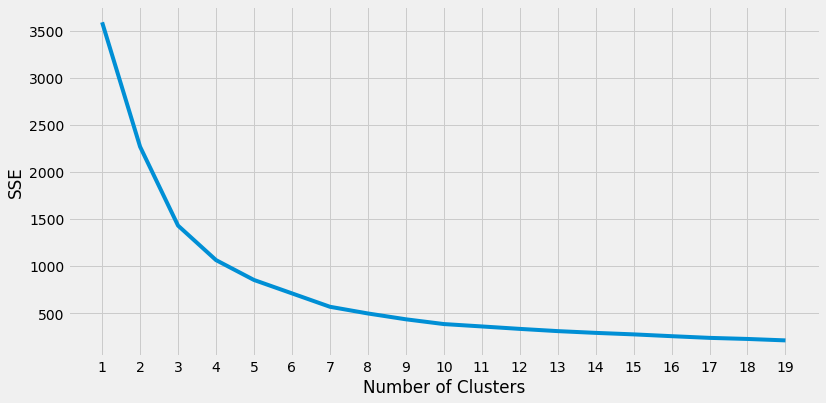

In [49]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [50]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
print("Optimal k-value is:",kl.elbow)

Optimal k-value is: 5


In [51]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalDf)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

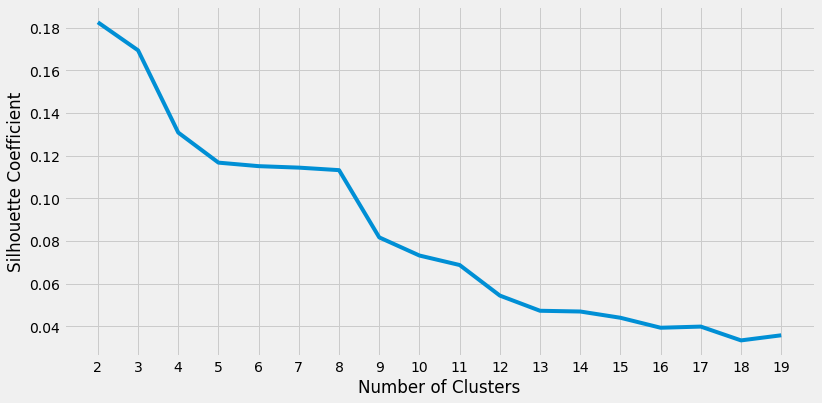

In [52]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [53]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

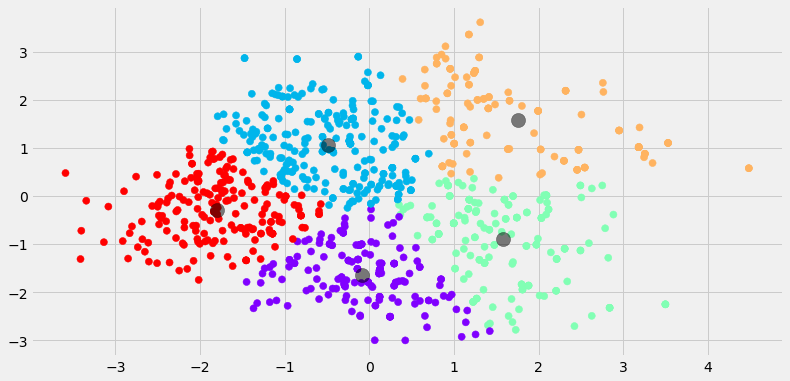

In [54]:
plt.scatter(principalDf['PC1'], principalDf['PC2'], c=y_kmeans, s=50, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
pass;

In [55]:
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

score_kemans_s = silhouette_score(principalDf, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(principalDf, kmeans.labels_)
score_kemans_d = davies_bouldin_score(principalDf, kmeans.fit_predict(principalDf))
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.3690
Calinski Harabasz Score: 735.7940
Davies Bouldin Score: 0.8846


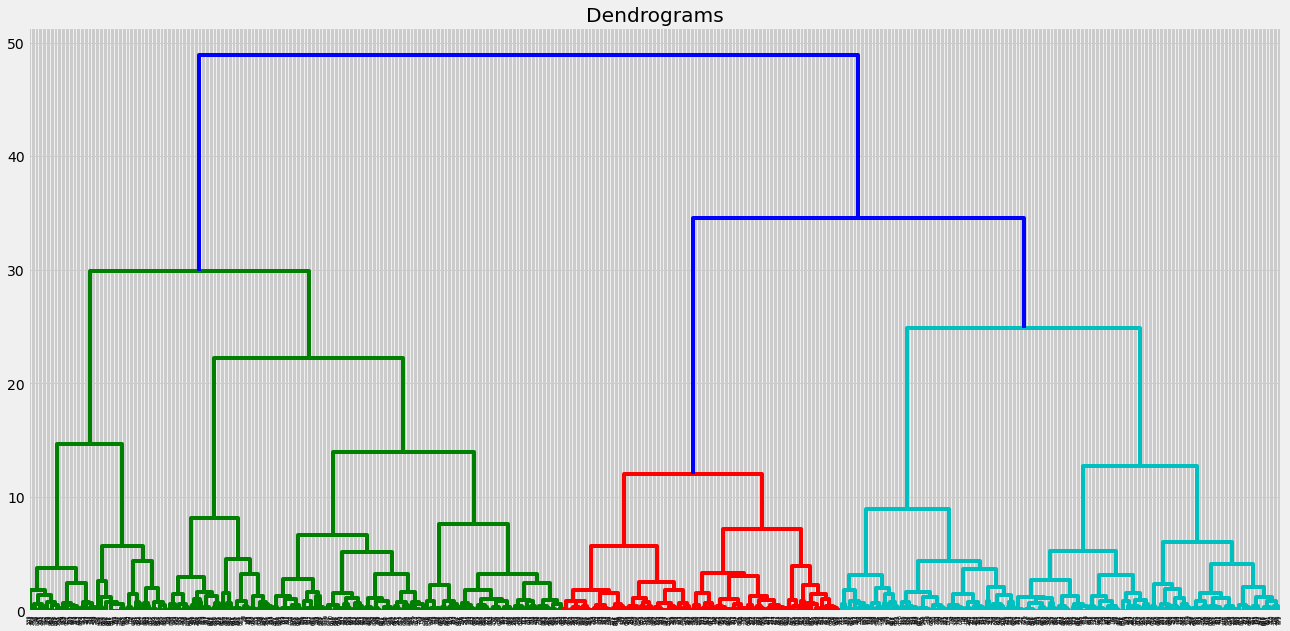

In [56]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(20, 10))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(principalDf, method='ward'))

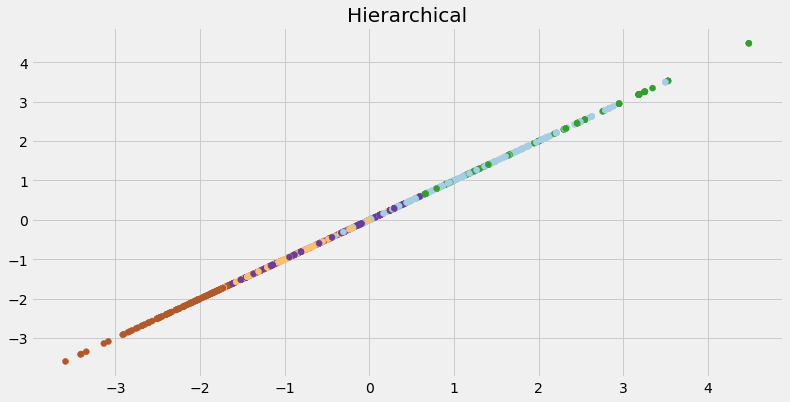

In [57]:
from sklearn.cluster import AgglomerativeClustering
def hier(X, n_clusters):
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(principalDf)
    plt.scatter(principalDf['PC1'], principalDf['PC1'],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")

hier(principalDf, 5)

0.4175199521218216


<Figure size 360x360 with 0 Axes>

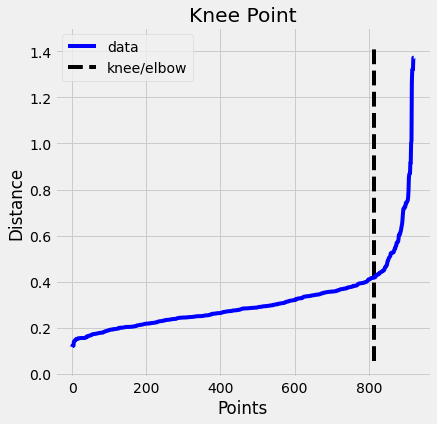

In [58]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(principalDf)
distances, indices = neighbors.kneighbors(principalDf)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
pass;
print(distances[knee.knee])
pass;

Optimal number of min_samples based on silhouette score: [6, 7]


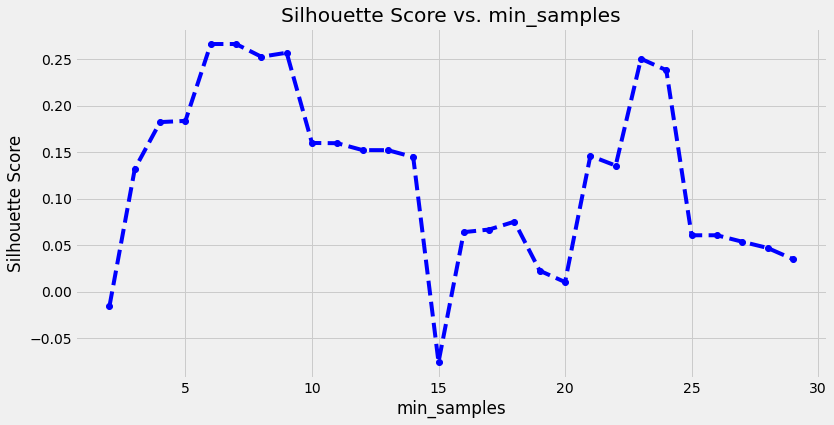

In [59]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    
    dbscan = DBSCAN(eps=distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(principalDf)
    
    # Calculate Silhoutte Score

    score = silhouette_score(principalDf, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principalDf, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [23]


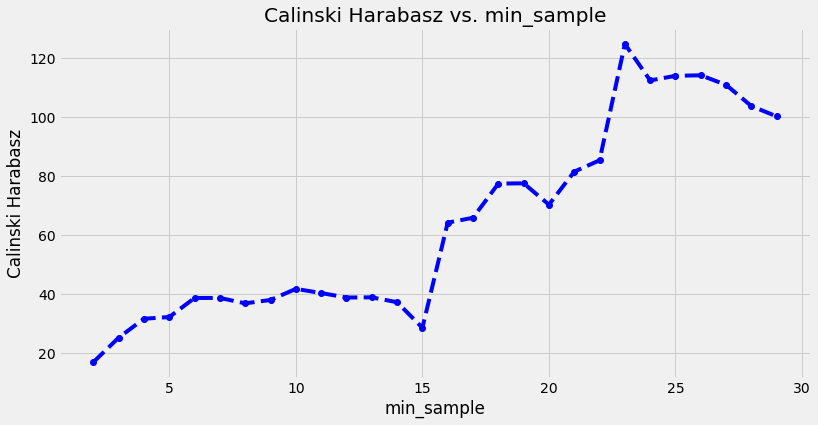

In [60]:
from sklearn.metrics import calinski_harabasz_score  

def get_dbscan_score(data, center):
    
    dbscan = DBSCAN(eps= distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(principalDf)
    
    # Calculate Silhoutte Score

    score = calinski_harabasz_score(principalDf, dbscan.labels_)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principalDf, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

Optimal number of min_samples based on DB score: [2]


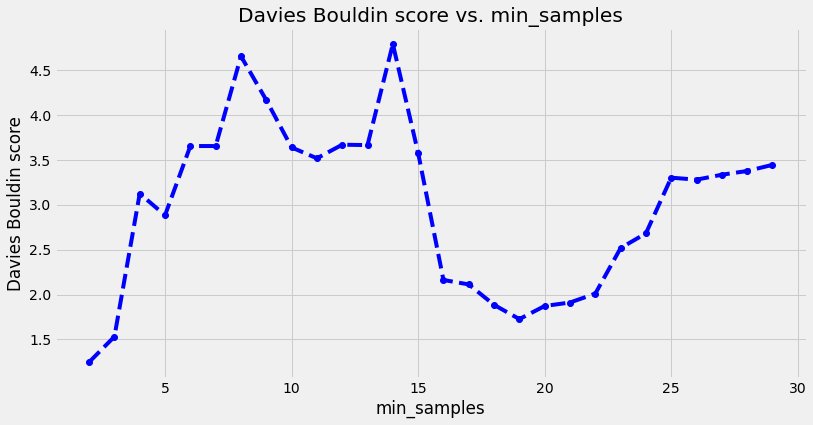

In [61]:
from sklearn.metrics import davies_bouldin_score 

def get_dbscan_score(data, center):
    dbscan = DBSCAN(eps= distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(principalDf)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(principalDf, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principalDf, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

In [62]:
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=distances[knee.knee], min_samples= 6)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(principalDf)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(principalDf, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(principalDf, yhat)
score_dbsacn_d = davies_bouldin_score(principalDf, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.2666
Calinski Harabasz Score: 38.7070
Davies Bouldin Score: 3.6553


No handles with labels found to put in legend.


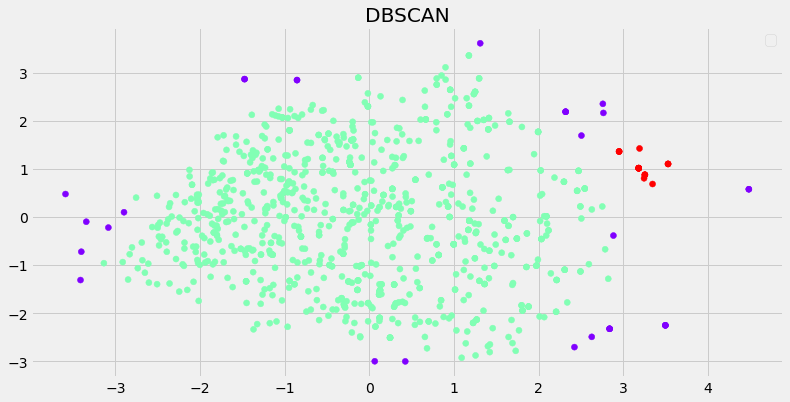

In [63]:
def dbscan():
    db = DBSCAN(eps=distances[knee.knee], min_samples=6)
    db.fit(principalDf)
    y_pred = db.fit_predict(principalDf)
    plt.scatter(principalDf['PC1'], principalDf['PC2'], c=y_pred, cmap='rainbow')
    plt.legend()
    plt.title("DBSCAN")
    pass;

dbscan()

Time Series Analysis Below

In [64]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv?raw=true')
df = df[['date_of_interest', 'CASE_COUNT']]
"""df = df[df['Province/State']=='New York']
df.drop(['Admin2', 'Country/Region', 'Province/State'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
# Set the date as index 
#df = df.set_index('Date')
#df['Case'] = df['Case'].cumsum()
df = df.groupby(['Date']).sum()"""
df['Date'] = pd.to_datetime(df['date_of_interest'])
df['Case'] = df['CASE_COUNT']
df.drop(['CASE_COUNT', 'date_of_interest'], axis=1, inplace=True)
# Set the date as index 
df = df.set_index('Date')
df

,Case
Date,
2020-02-29,1
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,5
...,...
2022-01-24,5211
2022-01-25,4350
2022-01-26,3805


Visualize Data

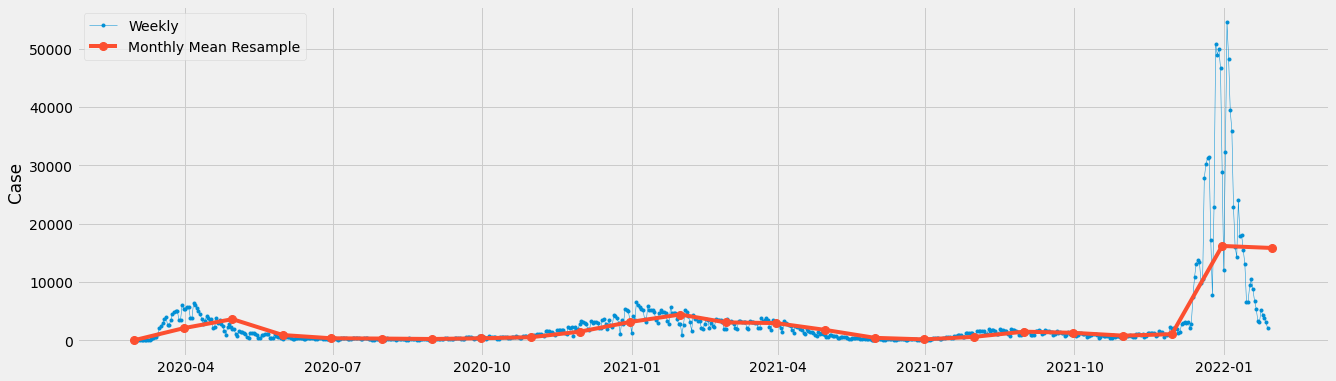

In [65]:
import warnings
import matplotlib.pyplot as plt
y = df['Case']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Case')
ax.legend();
pass;

Decompose Data

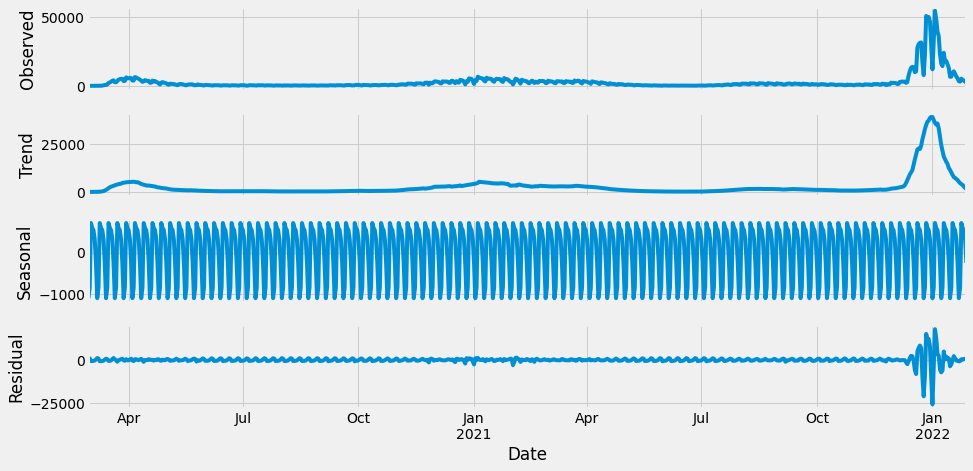

In [66]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
    pass;

seasonal_decompose(y)

Check Stationarity

Visualize the rolling statistics

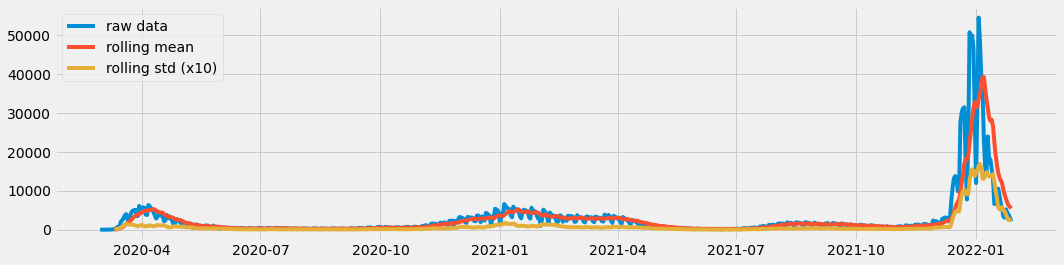

In [67]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
    pass;

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')
pass;

Augmented Dickey-Fuller Test

In [68]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [69]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -3.268
P-value = 0.016
Critical values :
	1%: -3.4399889432093325 - The data is not stationary with 99% confidence
	5%: -2.865793456189478 - The data is  stationary with 95% confidence
	10%: -2.5690350878361916 - The data is  stationary with 90% confidence


If data is not stationary, then detrend the dataset.

See below

 > Is the de-trended data stationary ?
Test statistic = -3.395
P-value = 0.011
Critical values :
	1%: -3.4401772556197705 - The data is not stationary with 99% confidence
	5%: -2.865876419242622 - The data is  stationary with 95% confidence
	10%: -2.569079289056617 - The data is  stationary with 90% confidence


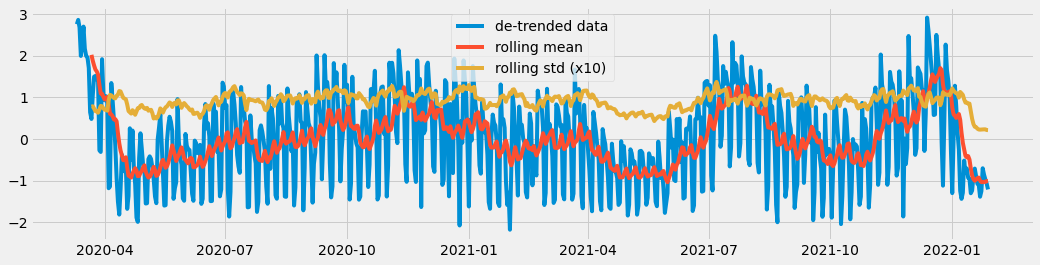

In [70]:
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

Differencing

 > Is the 12 lag differenced data stationary ?
Test statistic = -5.214
P-value = 0.000
Critical values :
	1%: -3.4401772556197705 - The data is  stationary with 99% confidence
	5%: -2.865876419242622 - The data is  stationary with 95% confidence
	10%: -2.569079289056617 - The data is  stationary with 90% confidence


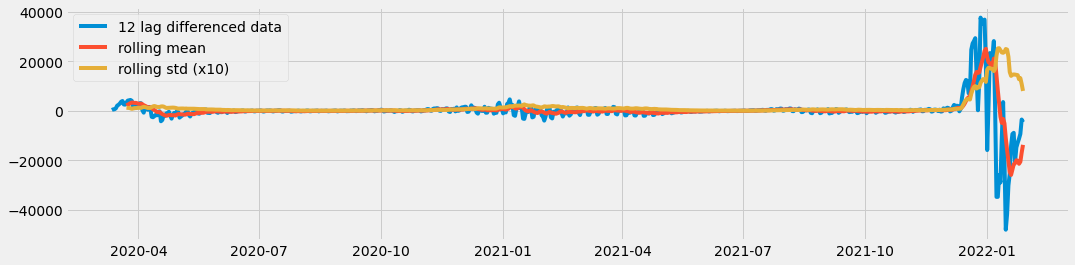

In [71]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

Combining Detrending and Differencing


 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -4.416
P-value = 0.000
Critical values :
	1%: -3.440357733229128 - The data is  stationary with 99% confidence
	5%: -2.8659559257802867 - The data is  stationary with 95% confidence
	10%: -2.569121649408834 - The data is  stationary with 90% confidence


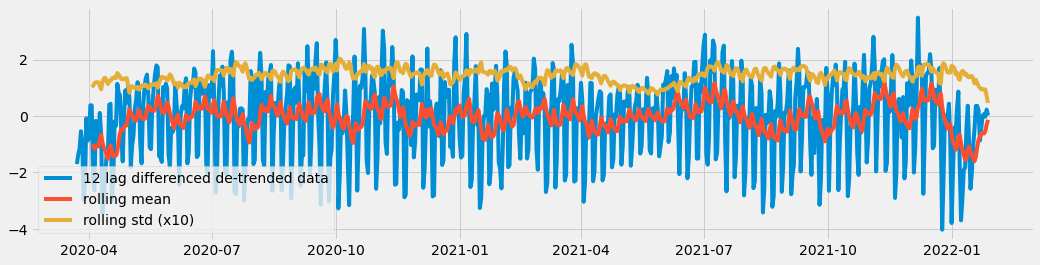

In [72]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

Set the y_to_train, y_to_test, and the length of predict units

Tips:

For the training variable, you need to declare the end date from the initial dataset. This date is should be the last date in the training variable. 

For the validation variable, you need to declare the first date after the end date of the training variable.

In [73]:
y_to_train = y[:'2021-05-31'] # dataset to train
y_to_val = y['2021-06-01':] # last X months for test  
predict_date = len(y) - len(y_to_train) # the number of data points for the test set
print('Total number of data points in the test set is: ',predict_date)

Total number of data points in the test set is:  242


In [74]:
y_to_train

Date
2020-02-29      1
2020-03-01      0
2020-03-02      0
2020-03-03      1
2020-03-04      5
             ... 
2021-05-27    257
2021-05-28    210
2021-05-29    126
2021-05-30    119
2021-05-31    118
Name: Case, Length: 458, dtype: int64

In [75]:
y_to_val

Date
2021-06-01     288
2021-06-02     244
2021-06-03     206
2021-06-04     224
2021-06-05     142
              ... 
2022-01-24    5211
2022-01-25    4350
2022-01-26    3805
2022-01-27    3114
2022-01-28    2138
Name: Case, Length: 242, dtype: int64

Check to make sure the entire dataset is used

In [76]:
len(y) == len(y_to_val) + len(y_to_train)

True

Simple Exponential Smoothing

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 10848.69


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


The Root Mean Squared Error of our forecasts with auto optimization is 10843.05


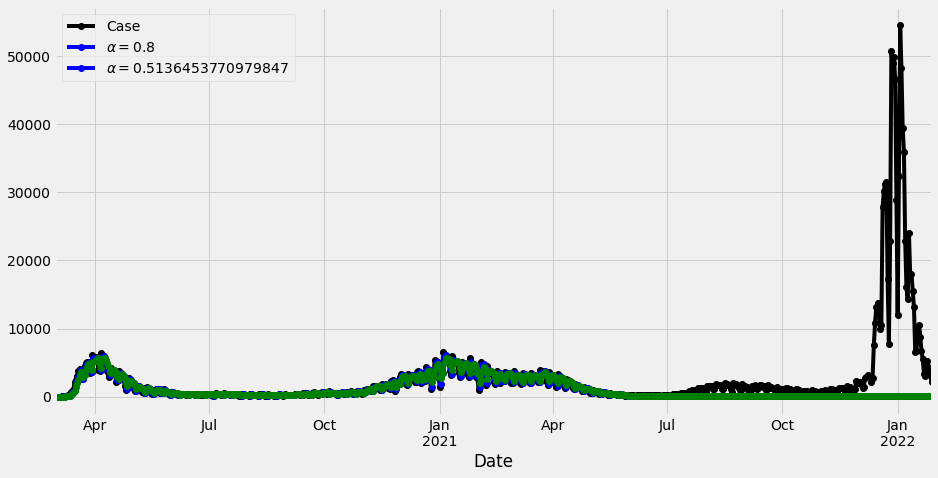

In [77]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()
    pass;

ses(y, y_to_train,y_to_val,0.8,predict_date)
pass;

Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


The Root Mean Squared Error of Holts Linear trend 13204.0
The Root Mean Squared Error of Holts Exponential trend 13204.0


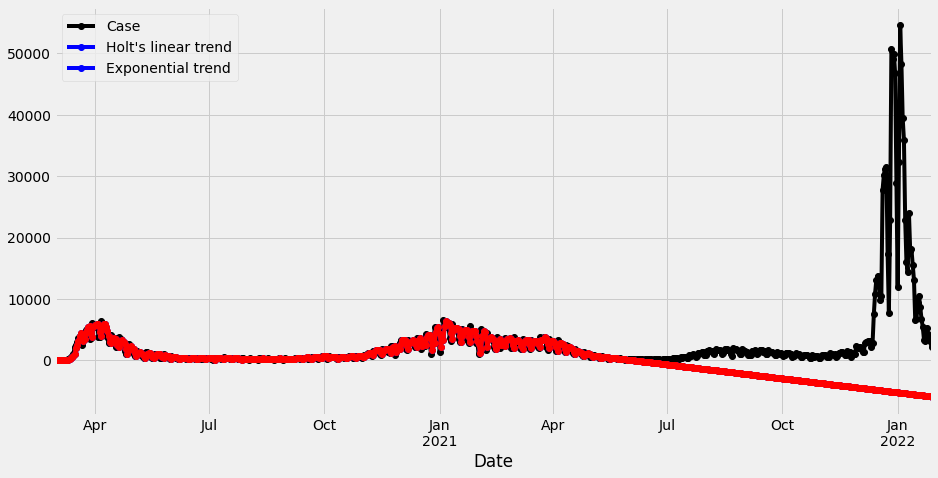

In [78]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    """
    ATTENTION: I see the exponential option to be FALSE just for this fit2.

    The Original notebook had it set to TRUE.
    """

    fit2 = Holt(y_to_train, exponential=False).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()
    pass;

holt(y, y_to_train,y_to_val,0.6,0.2,predict_date)

Holt-Winters


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: ignored

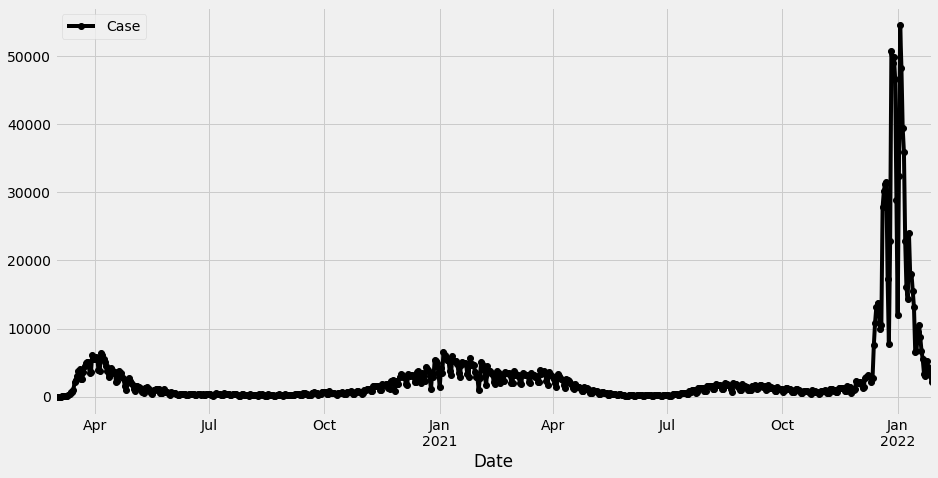

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)

    plt.show()
    pass;

holt_win_sea(y, y_to_train,y_to_val,'multiplicative',52, predict_date)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: ignored

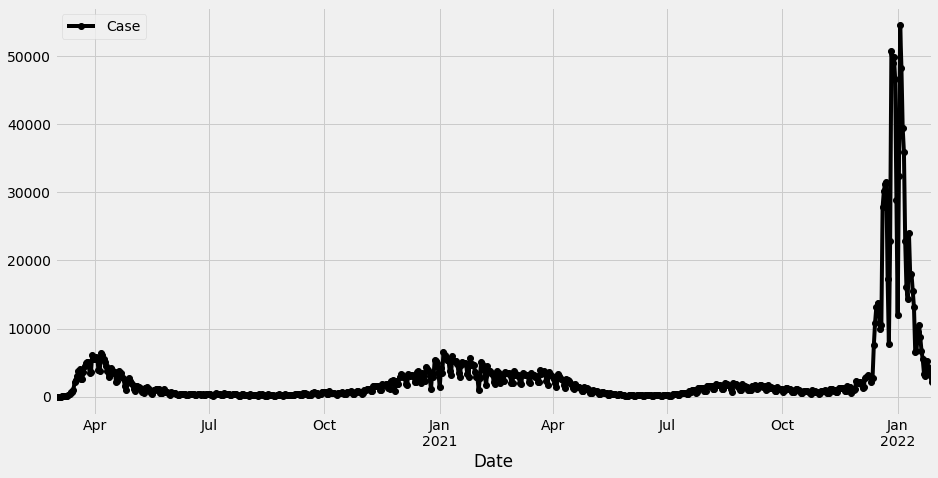

In [80]:
holt_win_sea(y, y_to_train,y_to_val,'additive',52, predict_date)

NOTE: The only error above is that I have 0 in the dataset for some dates

These are instances of no new infections for the particular day in NY

SARIMA

In [81]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [82]:
sarima_grid_search(y,52)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

The set of parameters with the minimum AIC is: SARIMA(1, 0, 1)x(0, 1, 1, 52) - AIC:10911.2824050348


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8671      0.007    118.256      0.000       0.853       0.881
ma.L1          0.4974      0.010     48.219      0.000       0.477       0.518
ma.S.L52      -0.6526      0.196     -3.332      0.001      -1.036      -0.269
sigma2      5.401e+06   6.77e+04     79.733      0.000    5.27e+06    5.53e+06


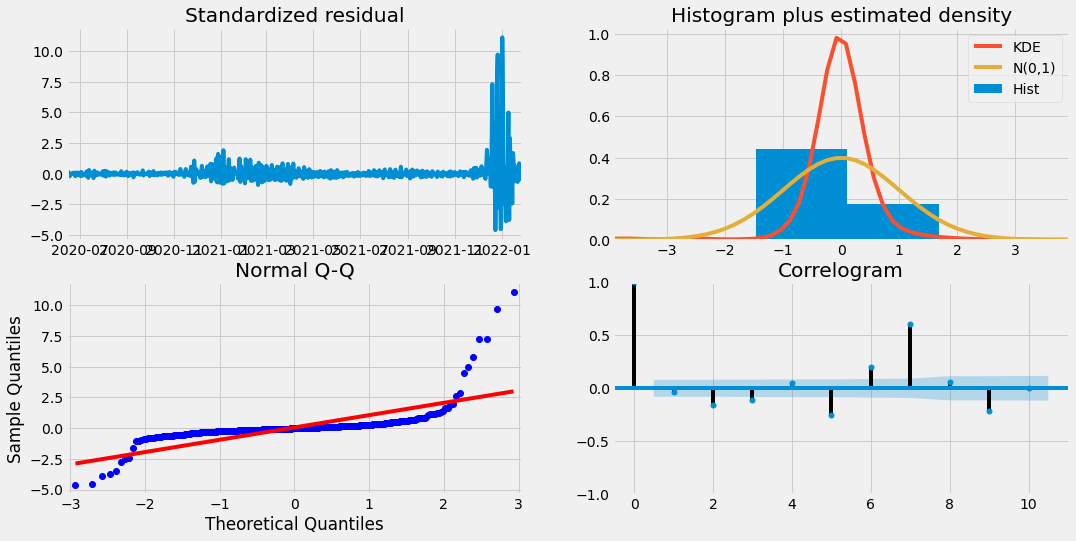

The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = False 3500.03


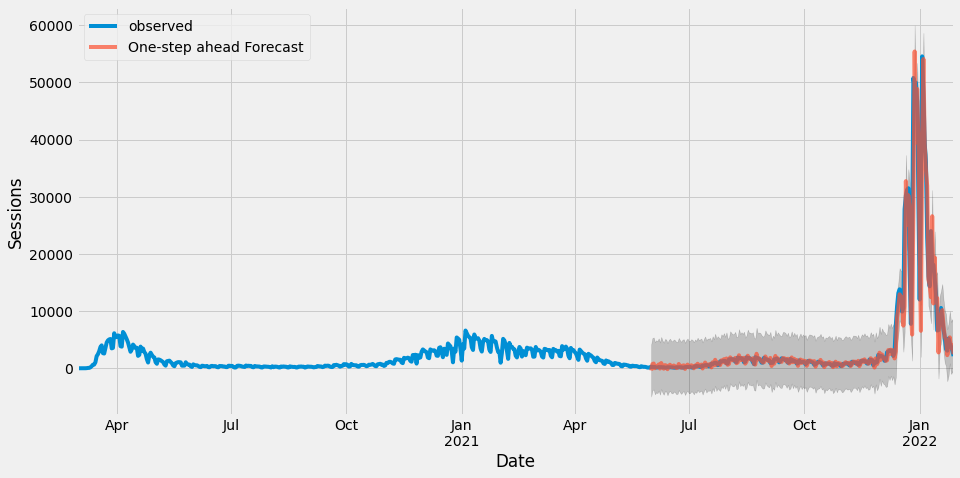

The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = True 10279.51


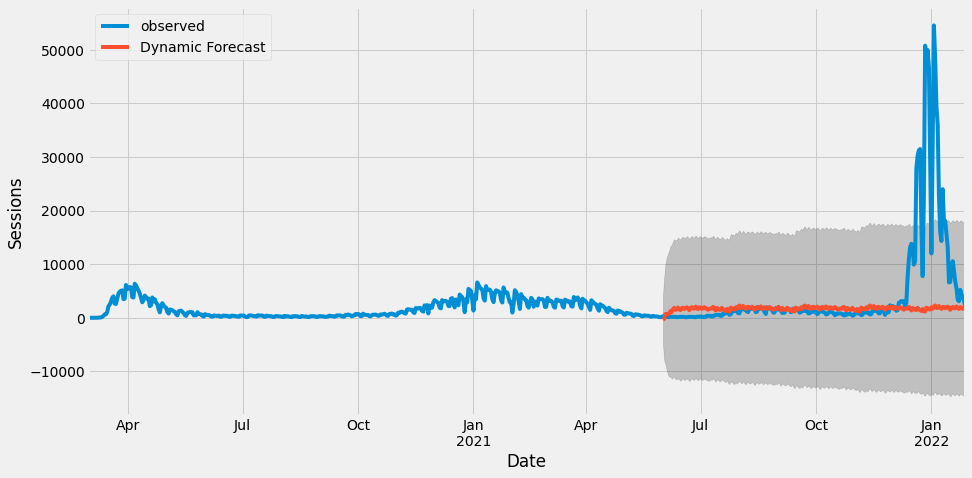

In [83]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

model = sarima_eva(y,(1, 0, 1),(0, 1, 1, 52),52,'2021-06-01',y_to_val)

In [84]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

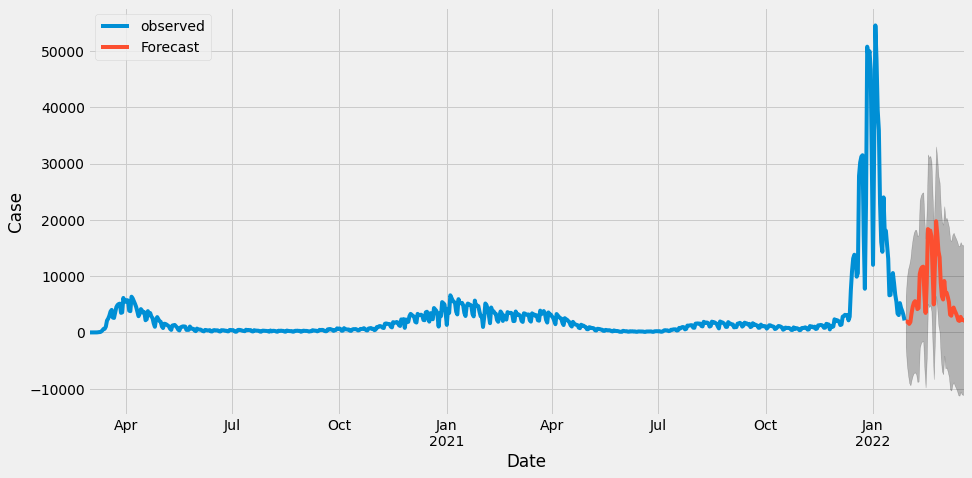

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-01-29,1962.41238107,-2592.49717774,6517.32193989
1,2022-01-30,1955.50866196,-5750.07663344,9661.09395736
2,2022-01-31,1830.90569839,-7572.32668738,11234.13808417
3,2022-02-01,1520.30634967,-8980.13746276,12020.75016210
4,2022-02-02,1869.33855173,-9385.86337237,13124.54047584


In [85]:
final_table = forecast(model,52,y)
final_table.head()

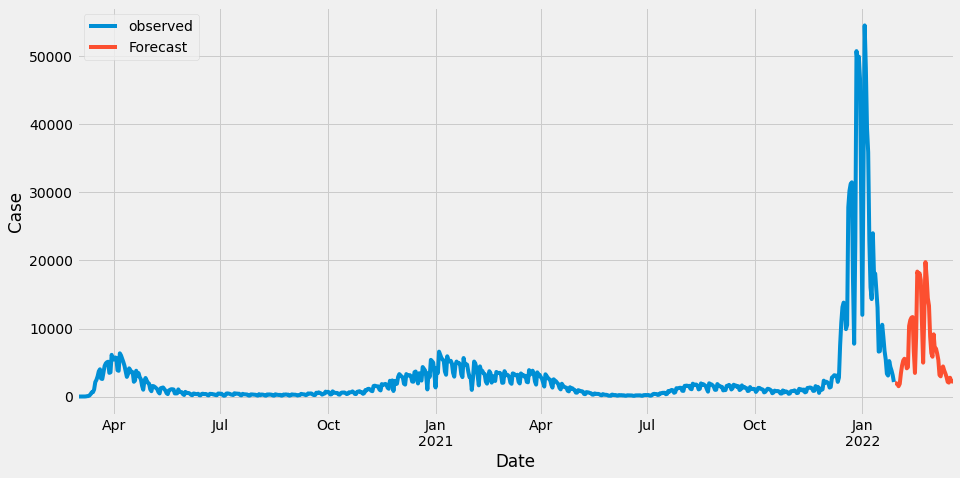

In [86]:
### Graphs without the confident interval 
pred_uc = model.get_forecast(steps=51)
ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel(y.name)

plt.legend()
plt.show()

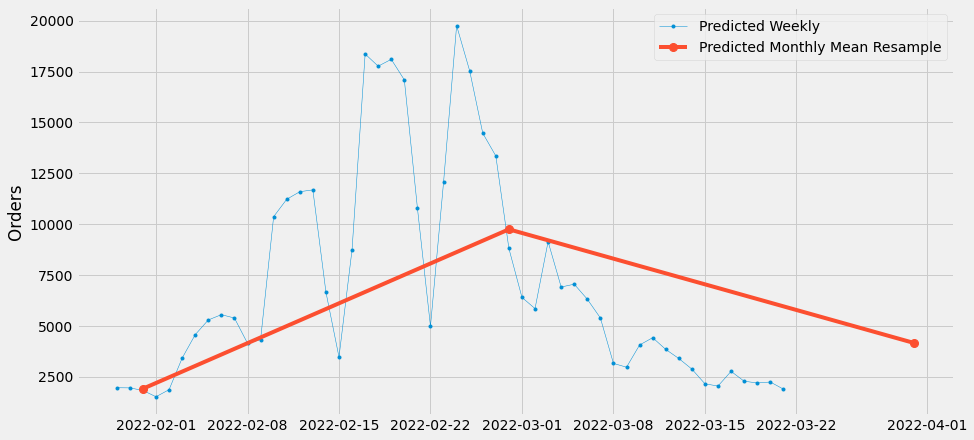

In [87]:
### Graphs show only the perdiected period
final_table.index = final_table.Date
fig, ax = plt.subplots( figsize=(14, 7))
# ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(final_table.Predicted_Mean,marker='.', linestyle='-', linewidth=0.5, label='Predicted Weekly')
# ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(final_table.Predicted_Mean.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Predicted Monthly Mean Resample')
ax.set_ylabel('Orders')
ax.legend();